In [6]:
using JuMP
using Ipopt

In [7]:
# user defined module
if !("." in LOAD_PATH)
    push!(LOAD_PATH, ".") # path to your-own-module
end
using process_model

In [8]:
# optimal control
function OptimalControl(x0)
    m=Model(Ipopt.Optimizer)
    @variable(m, x[i in 1:2, t in 0:(N)])
    @variable(m, u[i in 1:2, t in 0:(N-1)])    

    @constraint(m, [i in 1:2], x[i,0] == x0[i])
    #x1_plus = 2*x[1] + 1*x[2] + 1*u[1]
    @constraint(m, [t in 0:N-1], x[1, t+1] == 2*x[1,t] + 1*x[2,t] + 1*u[1,t])
    #x2_plus = 0*x[1] + 2*x[2] + 1*u[2]
    @constraint(m, [t in 0:N-1], x[2, t+1] == 0*x[1,t] + 2*x[2,t] + 1*u[2,t])

    @constraint(m, [t in 0:N-1], -5<= x[1, t] <=5 )
    @constraint(m, [t in 0:N-1, i in 1:2], -1<= u[i, t] <=1 )

    @constraint(m, -.1<= x[1,N] <=.1 )
    @constraint(m, -.1<= x[2,N] <=.1 )

    @objective(m, Min, 0.5*sum(alpha*x[i,t]^2 + u[i,t]^2 for t in 0:(N-1), i in 1:2))
    
    JuMP.optimize!(m)
    return [JuMP.value(u[1,0]),JuMP.value(u[2,0])]
end

# main
N=3
N_sim = 30
alpha=2

x = zeros(Float64,2,N_sim+1)           
u = zeros(Float64,2,N_sim)  
x[:,1] = [0.5, 0.5]
for t = 1:N_sim
    println("##############################################")
    println("Simulation time: ", t, " / ", N_sim, "")
    u[:,t] = OptimalControl(x[:,t])
    x[:,t+1] = StepModel(x[:,t], u[:,t])
    println("x[:, ", t+1, "] = ", x[:,t+1], ", ", "u[:, ", t, "] = ", u[:,t])
    if t == 15
        x[:,t+1] += [0.5, 0.1]
    end
    sleep(3)
end
println("#####################final result#####################")
println(u)

##############################################
Simulation time: 1 / 30
This is Ipopt version 3.14.10, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:       23
Number of nonzeros in inequality constraint Jacobian.:       22
Number of nonzeros in Lagrangian Hessian.............:       12

Total number of variables............................:       14
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        8
Total number of inequality constraints...............:       22
        inequality constraints with only lower bounds:       11
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       11

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

2] = [0.49999999152779817, 0.009278396743268136], u[:, 1] = [-1.0000000084722018, -0.9907216032567319]


##############################################
Simulation time: 2 / 30
This is Ipopt version 3.14.10, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:       23
Number of nonzeros in inequality constraint Jacobian.:       22
Number of nonzeros in Lagrangian Hessian.............:       12

Total number of variables............................:       14
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        8
Total number of inequality constraints...............:       22
        inequality constraints with only lower bounds:       11
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       11

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

##############################################
Simulation time: 3 / 30
This is Ipopt version 3.14.10, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:       23
Number of nonzeros in inequality constraint Jacobian.:       22
Number of nonzeros in Lagrangian Hessian.............:       12

Total number of variables............................:       14
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        8
Total number of inequality constraints...............:       22
        inequality constraints with only lower bounds:       11
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       11

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

##############################################
Simulation time: 4 / 30
This is Ipopt version 3.14.10, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:       23
Number of nonzeros in inequality constraint Jacobian.:       22
Number of nonzeros in Lagrangian Hessian.............:       12

Total number of variables............................:       14
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        8
Total number of inequality constraints...............:       22
        inequality constraints with only lower bounds:       11
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       11

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

##############################################
Simulation time: 5 / 30
This is Ipopt version 3.14.10, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:       23
Number of nonzeros in inequality constraint Jacobian.:       22
Number of nonzeros in Lagrangian Hessian.............:       12

Total number of variables............................:       14
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        8
Total number of inequality constraints...............:       22
        inequality constraints with only lower bounds:       11
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       11

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

##############################################
Simulation time: 6 / 30
This is Ipopt version 3.14.10, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:       23
Number of nonzeros in inequality constraint Jacobian.:       22
Number of nonzeros in Lagrangian Hessian.............:       12

Total number of variables............................:       14
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        8
Total number of inequality constraints...............:       22
        inequality constraints with only lower bounds:       11
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       11

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

7] = [0.0017383763953925692, -0.0020366727959655485], u[:, 6] = [-0.005396822922259768, 0.00854452973736211]


##############################################
Simulation time: 7 / 30
This is Ipopt version 3.14.10, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:       23
Number of nonzeros in inequality constraint Jacobian.:       22
Number of nonzeros in Lagrangian Hessian.............:       12

Total number of variables............................:       14
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        8
Total number of inequality constraints...............:       22
        inequality constraints with only lower bounds:       11
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       11

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

##############################################
Simulation time: 8 / 30
This is Ipopt version 3.14.10, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:       23
Number of nonzeros in inequality constraint Jacobian.:       22
Number of nonzeros in Lagrangian Hessian.............:       12

Total number of variables............................:       14
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        8
Total number of inequality constraints...............:       22
        inequality constraints with only lower bounds:       11
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       11

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

##############################################
Simulation time: 9 / 30
This is Ipopt version 3.14.10, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:       23
Number of nonzeros in inequality constraint Jacobian.:       22
Number of nonzeros in Lagrangian Hessian.............:       12

Total number of variables............................:       14
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        8
Total number of inequality constraints...............:       22
        inequality constraints with only lower bounds:       11
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       11

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0  

##############################################
Simulation time: 10 / 30
This is Ipopt version 3.14.10, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:       23
Number of nonzeros in inequality constraint Jacobian.:       22
Number of nonzeros in Lagrangian Hessian.............:       12

Total number of variables............................:       14
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        8
Total number of inequality constraints...............:       22
        inequality constraints with only lower bounds:       11
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       11

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

##############################################
Simulation time: 11 / 30
This is Ipopt version 3.14.10, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:       23
Number of nonzeros in inequality constraint Jacobian.:       22
Number of nonzeros in Lagrangian Hessian.............:       12

Total number of variables............................:       14
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        8
Total number of inequality constraints...............:       22
        inequality constraints with only lower bounds:       11
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       11

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

12] = [-5.268419324082358e-6, -6.274720176810387e-6], u[:, 11] = [3.2952734606772994e-5, 4.049053732056735e-5]


##############################################
Simulation time: 12 / 30
This is Ipopt version 3.14.10, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:       23
Number of nonzeros in inequality constraint Jacobian.:       22
Number of nonzeros in Lagrangian Hessian.............:       12

Total number of variables............................:       14
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        8
Total number of inequality constraints...............:       22
        inequality constraints with only lower bounds:       11
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       11

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

##############################################
Simulation time: 13 / 30
This is Ipopt version 3.14.10, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:       23
Number of nonzeros in inequality constraint Jacobian.:       22
Number of nonzeros in Lagrangian Hessian.............:       12

Total number of variables............................:       14
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        8
Total number of inequality constraints...............:       22
        inequality constraints with only lower bounds:       11
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       11

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

##############################################
Simulation time: 14 / 30
This is Ipopt version 3.14.10, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:       23
Number of nonzeros in inequality constraint Jacobian.:       22
Number of nonzeros in Lagrangian Hessian.............:       12

Total number of variables............................:       14
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        8
Total number of inequality constraints...............:       22
        inequality constraints with only lower bounds:       11
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       11

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

##############################################
Simulation time: 15 / 30
This is Ipopt version 3.14.10, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:       23
Number of nonzeros in inequality constraint Jacobian.:       22
Number of nonzeros in Lagrangian Hessian.............:       12

Total number of variables............................:       14
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        8
Total number of inequality constraints...............:       22
        inequality constraints with only lower bounds:       11
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       11

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

##############################################
Simulation time: 16 / 30
This is Ipopt version 3.14.10, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:       23
Number of nonzeros in inequality constraint Jacobian.:       22
Number of nonzeros in Lagrangian Hessian.............:       12

Total number of variables............................:       14
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        8
Total number of inequality constraints...............:       22
        inequality constraints with only lower bounds:       11
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       11

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

##############################################
Simulation time: 17 / 30
This is Ipopt version 3.14.10, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:       23
Number of nonzeros in inequality constraint Jacobian.:       22
Number of nonzeros in Lagrangian Hessian.............:       12

Total number of variables............................:       14
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        8
Total number of inequality constraints...............:       22
        inequality constraints with only lower bounds:       11
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       11

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

##############################################
Simulation time: 18 / 30
This is Ipopt version 3.14.10, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:       23
Number of nonzeros in inequality constraint Jacobian.:       22
Number of nonzeros in Lagrangian Hessian.............:       12

Total number of variables............................:       14
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        8
Total number of inequality constraints...............:       22
        inequality constraints with only lower bounds:       11
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       11

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

##############################################
Simulation time: 19 / 30
This is Ipopt version 3.14.10, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:       23
Number of nonzeros in inequality constraint Jacobian.:       22
Number of nonzeros in Lagrangian Hessian.............:       12

Total number of variables............................:       14
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        8
Total number of inequality constraints...............:       22
        inequality constraints with only lower bounds:       11
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       11

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

##############################################
Simulation time: 20 / 30
This is Ipopt version 3.14.10, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:       23
Number of nonzeros in inequality constraint Jacobian.:       22
Number of nonzeros in Lagrangian Hessian.............:       12

Total number of variables............................:       14
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        8
Total number of inequality constraints...............:       22
        inequality constraints with only lower bounds:       11
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       11

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

##############################################
Simulation time: 21 / 30
This is Ipopt version 3.14.10, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:       23
Number of nonzeros in inequality constraint Jacobian.:       22
Number of nonzeros in Lagrangian Hessian.............:       12

Total number of variables............................:       14
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        8
Total number of inequality constraints...............:       22
        inequality constraints with only lower bounds:       11
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       11

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

##############################################
Simulation time: 22 / 30
This is Ipopt version 3.14.10, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:       23
Number of nonzeros in inequality constraint Jacobian.:       22
Number of nonzeros in Lagrangian Hessian.............:       12

Total number of variables............................:       14
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        8
Total number of inequality constraints...............:       22
        inequality constraints with only lower bounds:       11
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       11

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

23] = [0.0001357327174178762, -0.0002725740255947375], u[:, 22] = [-0.0002699790357540935, 0.001272768675324571]


##############################################
Simulation time: 23 / 30
This is Ipopt version 3.14.10, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:       23
Number of nonzeros in inequality constraint Jacobian.:       22
Number of nonzeros in Lagrangian Hessian.............:       12

Total number of variables............................:       14
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        8
Total number of inequality constraints...............:       22
        inequality constraints with only lower bounds:       11
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       11

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

24] = [2.110328344681498e-5, -9.051770791624513e-5], u[:, 23] = [2.2211874205800104e-5, 0.0004546303432732299]


##############################################
Simulation time: 24 / 30
This is Ipopt version 3.14.10, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:       23
Number of nonzeros in inequality constraint Jacobian.:       22
Number of nonzeros in Lagrangian Hessian.............:       12

Total number of variables............................:       14
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        8
Total number of inequality constraints...............:       22
        inequality constraints with only lower bounds:       11
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       11

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

##############################################
Simulation time: 25 / 30
This is Ipopt version 3.14.10, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:       23
Number of nonzeros in inequality constraint Jacobian.:       22
Number of nonzeros in Lagrangian Hessian.............:       12

Total number of variables............................:       14
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        8
Total number of inequality constraints...............:       22
        inequality constraints with only lower bounds:       11
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       11

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

##############################################
Simulation time: 26 / 30
This is Ipopt version 3.14.10, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:       23
Number of nonzeros in inequality constraint Jacobian.:       22
Number of nonzeros in Lagrangian Hessian.............:       12

Total number of variables............................:       14
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        8
Total number of inequality constraints...............:       22
        inequality constraints with only lower bounds:       11
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       11

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

##############################################
Simulation time: 27 / 30
This is Ipopt version 3.14.10, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:       23
Number of nonzeros in inequality constraint Jacobian.:       22
Number of nonzeros in Lagrangian Hessian.............:       12

Total number of variables............................:       14
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        8
Total number of inequality constraints...............:       22
        inequality constraints with only lower bounds:       11
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       11

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

##############################################
Simulation time: 28 / 30
This is Ipopt version 3.14.10, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:       23
Number of nonzeros in inequality constraint Jacobian.:       22
Number of nonzeros in Lagrangian Hessian.............:       12

Total number of variables............................:       14
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        8
Total number of inequality constraints...............:       22
        inequality constraints with only lower bounds:       11
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       11

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

##############################################
Simulation time: 29 / 30
This is Ipopt version 3.14.10, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:       23
Number of nonzeros in inequality constraint Jacobian.:       22
Number of nonzeros in Lagrangian Hessian.............:       12

Total number of variables............................:       14
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        8
Total number of inequality constraints...............:       22
        inequality constraints with only lower bounds:       11
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       11

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

##############################################
Simulation time: 30 / 30
This is Ipopt version 3.14.10, running with linear solver MUMPS 5.5.1.

Number of nonzeros in equality constraint Jacobian...:       23
Number of nonzeros in inequality constraint Jacobian.:       22
Number of nonzeros in Lagrangian Hessian.............:       12

Total number of variables............................:       14
                     variables with only lower bounds:        0
                variables with lower and upper bounds:        0
                     variables with only upper bounds:        0
Total number of equality constraints.................:        8
Total number of inequality constraints...............:       22
        inequality constraints with only lower bounds:       11
   inequality constraints with lower and upper bounds:        0
        inequality constraints with only upper bounds:       11

iter    objective    inf_pr   inf_du lg(mu)  ||d||  lg(rg) alpha_du alpha_pr  ls
   0 

#####################final result#####################
[-1.0000000084722018 -0.8288362004446103 -0.2566076809680251 -0.07830035092537121 -0.021939399841587937 -0.005396822922259768 -0.0010134828633103694 -4.0607461217272706e-5 9.185960984288042e-5 6.580144059239173e-5 3.2952734606772994e-5 1.418074628251391e-5 5.558858057308582e-6 2.0309421920118623e-6 6.976977701637434e-7 -0.9128097095535876 -0.2890111693335193 -0.09238838770397723 -0.027501074403432725 -0.007440513859318954 -0.0017193157979223097 -0.0002699790357540935 2.2211874205800104e-5 4.641778489720597e-5 2.8239520646956383e-5 1.3321828177903224e-5 5.540796090238737e-6 2.119658496806798e-6 7.587667914438809e-7 2.5563748652165643e-7; -0.9907216032567319 -0.060317865662536 0.05717325478199826 0.04008613800655883 0.01993268100022328 0.00854452973736211 0.0033403829136936076 0.0012177033336043868 0.0004174516743584159 0.00013460211401684696 4.049053732056735e-5 1.1121844762829115e-5 2.642354106917595e-6 4.516486139980584e-7 -9.7315

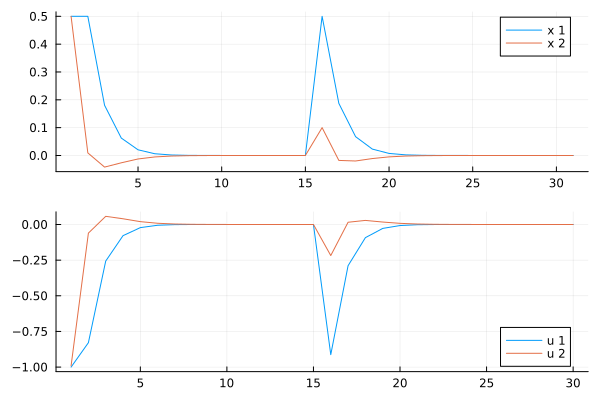

In [9]:
# plot result
using Plots
l = @layout [a; b]
p1 = plot(x[1,:], label="x 1")
plot!(p1, x[2,:], label="x 2")
p2 = plot(u[1,:], label="u 1")
plot!(p2, u[2,:], label="u 2")
plot(p1, p2, layout = l)